# this notebook show class-wise distribution of bounding box

# import library

In [1]:
import json
import glob
import pandas as pd

In [2]:
def get_cat_id_info(cat_id_list):
    cat_2_id,id_2_cat ={},{}
    for item in cat_id_list:
        cat_2_id[item["name"]] = item["id"]
        id_2_cat[item["id"]] = item["name"]
    return cat_2_id, id_2_cat

def get_stats(lst):
    min_data = np.min(lst)
    max_data =np.max(lst)
    mean_data =np.mean(lst)
    std_data =np.std(lst)
    return min_data,max_data,round(mean_data,2),round(std_data,3)
    
def find_area_width_height(box,annot_format="coco"):
    
    if annot_format =="coco":
        x1,y1,w,h = box[0:4]
        
    if annot_format =="voc":
        x1,y1,x2,y2 = box[0:4]
        w=np.abs(x1-x2)
        h=np.abs(y1-y2)
        
    return int(w),int(h),int(w*h)
        
def print_stats(annot_dict):
    df=pd.DataFrame(columns=['class_name','total_count','min_width','max_width','mean_width','std_width',
                        'min_height','max_height','mean_height','std_height',
                        'min_area','max_area','mean_area','std_area'])
    
    print("----------------------- stats -------------------------------")
    print("total category : ",len(annot_dict["cat_ids"]))
    print("category IDS: \n",annot_dict["cat_ids"])
    print("category names: \n",annot_dict["cat_names"])
    print("classwise distribution : ")
    for key,value in annot_dict["class_info"].items():
        if key=="_background_":
            continue
        value =value[0]
        print("\t{} : Total = {} ".format(key,value["total_count"]))
        print("")
        print("\tmin width : {}, max width {}, mean : {}, std : {} ".format(*value["width"]))
        print("\tmin height : {}, max height {}, mean : {}, std : {} ".format(*value["height"]))
        print("\tmin area : {}, max area {}, mean : {}, std : {} ".format(*value["area"]))
#         total_info.append([value["total_count"],value["width"][0],value["height"][0],value["area"][0]])
#         total_count=total_count+value["total_count"]
        print("\n\t----------------------------------------------------------------------")
        df.loc[len(df.index)] = [key,value["total_count"],*value["width"],*value["height"],*value["area"]]
    
    
    print("Total bounding box : ",annot_dict["total_count"])
    print("min width : {}, max width {}, mean : {}, std : {} ".format(*annot_dict["total_width"]))
    print("min height : {}, max height {}, mean : {}, std : {} ".format(*annot_dict["total_height"]))
    print("min area : {}, max area {}, mean : {}, std : {} ".format(*annot_dict["total_area"]))
    print("\n----------------------------------------------------------------------")
    df.loc[len(df.index)] = ["Total",annot_dict["total_count"],*annot_dict["total_width"],*annot_dict["total_height"],*annot_dict["total_area"]]
    return df
import pandas as pd
def get_annotation_stats(path, annot_format="coco"):  # 'voc',"yolo"
    
    
    if annot_format == "coco":
        with open(path, 'r') as file:
            json_data = json.load(file)
        cat_2_id, id_2_cat = get_cat_id_info(json_data["categories"])
        info = {}
        info["cat_ids"] = list(cat_2_id.values())
        info["cat_names"] = list(cat_2_id.keys())
        info["class_info"] = {i: [] for i in cat_2_id.keys()}
        cat_id_info = {i: [] for i in id_2_cat.keys()}
        for item in json_data["annotations"]:
            width, height, area = find_area_width_height(item["bbox"])
            cat_id_info[item["category_id"]].append([width, height, area])
        total_count =0
        t_width,t_height,t_area=[],[],[]
        for ids, lst in cat_id_info.items():
            if len(lst)==0: # for background _background_ == we have zero list
                continue
            temp = {}
            temp["cat_name"] = ids 
            temp['total_count'] = len(lst)
            total_count = total_count+ len(lst)
            temp["width"] = get_stats([box[0] for box in lst])
            t_width.extend([box[0] for box in lst])
            
            temp["height"] = get_stats([box[1] for box in lst])
            t_height.extend([box[1] for box in lst])
            
            temp["area"] = get_stats([box[2] for box in lst])
            t_area.extend([box[2] for box in lst])
            
            info["class_info"][id_2_cat[ids]].append(temp)
            
        info["total_count"]=total_count
        info['total_width'] = get_stats(t_width)
        info['total_height'] = get_stats(t_height)
        info['total_area'] = get_stats(t_area)
#         print(info.keys())
        return print_stats(info)

 # coco json path 

In [7]:
# json_path = r"D:\work\trackout\training_data\train_test\test.json"
track_json_path = r"D:\work\track_ppt\test.json"
flue_json_path =r"D:\UserData\z004k7nr\OneDrive - Siemens AG\General\data\Data Annotations\UC 2 - Fuel and Water Tank Detection\v1\combined_v1_demo\cocoannotations.json"

In [8]:
trackout_df = get_annotation_stats(track_json_path, annot_format="coco")

----------------------- stats -------------------------------
total category :  4
category IDS: 
 [0, 1, 2, 3]
category names: 
 ['_background_', 'tire_marks', 'trackout', 'unclear']
classwise distribution : 
	tire_marks : Total = 171 

	min width : 70, max width 537, mean : 224.58, std : 101.848 
	min height : 46, max height 374, mean : 151.18, std : 71.001 
	min area : 6300, max area 198220, mean : 37865.41, std : 34014.736 

	----------------------------------------------------------------------
	trackout : Total = 44 

	min width : 80, max width 436, mean : 262.14, std : 117.225 
	min height : 99, max height 374, mean : 219.98, std : 80.533 
	min area : 11120, max area 145040, mean : 63756.16, std : 40486.806 

	----------------------------------------------------------------------
	unclear : Total = 8 

	min width : 86, max width 146, mean : 113.12, std : 18.671 
	min height : 57, max height 119, mean : 82.12, std : 17.222 
	min area : 6192, max area 16065, mean : 9339.12, std : 2

In [6]:
trackout_df

,class_name,total_count,min_width,max_width,mean_width,std_width,min_height,max_height,mean_height,std_height,min_area,max_area,mean_area,std_area
0,tire_marks,808,35,577,203.12,100.473,42,471,168.62,78.508,2695,210028,38812.27,35871.068
1,trackout,270,78,514,277.46,98.493,53,455,238.34,88.821,7800,233870,71344.80,43547.200
2,unclear,36,55,456,171.31,90.600,57,384,153.97,91.236,4675,121401,29099.25,24827.819
3,Total,1114,35,577,220.11,104.986,42,471,185.05,86.987,2695,233870,46383.29,40187.943


array([[<AxesSubplot:title={'center':'total_count'}>,
        <AxesSubplot:title={'center':'min_width'}>,
        <AxesSubplot:title={'center':'max_width'}>,
        <AxesSubplot:title={'center':'mean_width'}>],
       [<AxesSubplot:title={'center':'std_width'}>,
        <AxesSubplot:title={'center':'min_height'}>,
        <AxesSubplot:title={'center':'max_height'}>,
        <AxesSubplot:title={'center':'mean_height'}>],
       [<AxesSubplot:title={'center':'std_height'}>,
        <AxesSubplot:title={'center':'min_area'}>,
        <AxesSubplot:title={'center':'max_area'}>,
        <AxesSubplot:title={'center':'mean_area'}>],
       [<AxesSubplot:title={'center':'std_area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

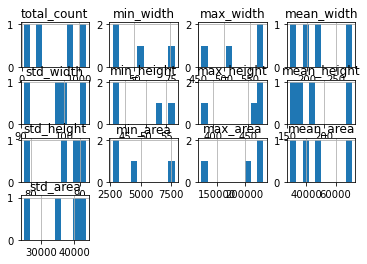

In [7]:
trackout_df.hist()

In [8]:
flue_df  = get_annotation_stats(flue_json_path, annot_format="coco")

----------------------- stats -------------------------------
total category :  7
category IDS: 
 [0, 1, 2, 3, 4, 5, 6]
category names: 
 ['_background_', 'water_tank', 'effluent_tank', 'fuel_tank', 'effluent_tanks', 'enclosure', 'trackout']
classwise distribution : 
	water_tank : Total = 797 

	min width : 34, max width 1206, mean : 265.5, std : 286.048 
	min height : 27, max height 894, mean : 232.6, std : 199.136 
	min area : 945, max area 921714, mean : 112514.01, std : 219383.436 

	----------------------------------------------------------------------
	effluent_tank : Total = 19 

	min width : 98, max width 504, mean : 308.47, std : 83.321 
	min height : 98, max height 516, mean : 264.26, std : 110.634 
	min area : 9604, max area 260064, mean : 89040.26, std : 57338.856 

	----------------------------------------------------------------------
	fuel_tank : Total = 30 

	min width : 107, max width 401, mean : 197.7, std : 109.747 
	min height : 156, max height 535, mean : 278.03, s

In [9]:
flue_df

,class_name,total_count,min_width,max_width,mean_width,std_width,min_height,max_height,mean_height,std_height,min_area,max_area,mean_area,std_area
0,water_tank,797,34,1206,265.50,286.048,27,894,232.60,199.136,945,921714,112514.01,219383.436
1,effluent_tank,19,98,504,308.47,83.321,98,516,264.26,110.634,9604,260064,89040.26,57338.856
2,fuel_tank,30,107,401,197.70,109.747,156,535,278.03,143.067,20768,203312,70410.27,74761.477
3,effluent_tanks,3,136,225,192.67,40.202,98,167,141.33,30.815,13328,37575,28468.67,10779.274
4,enclosure,6,198,1154,511.00,428.768,257,520,343.83,105.974,50886,600080,220623.17,234266.565
5,trackout,1,335,335,335.00,0.000,305,305,305.00,0.000,102175,102175,102175.00,0.000
6,Total,856,34,1206,265.62,280.540,27,894,235.44,195.452,945,921714,110968.53,213645.743
